In [32]:

!unzip -qq archive.zip

In [35]:
import os, shutil, pathlib

original_dir = pathlib.Path("./archive/train/train/")
new_base_dir = pathlib.Path("./C_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)

In [72]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [73]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                       

In [74]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [75]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [76]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [77]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


In [78]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [79]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


In [80]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [81]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 6s 75ms/step - loss: 0.7745 - accuracy: 0.5170 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 5s 72ms/step - loss: 0.7236 - accuracy: 0.5310 - val_loss: 0.6750 - val_accuracy: 0.5660
Epoch 3/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6907 - accuracy: 0.5840 - val_loss: 0.6381 - val_accuracy: 0.6440
Epoch 4/30
63/63 [==============================] - 5s 72ms/step - loss: 0.6406 - accuracy: 0.6410 - val_loss: 0.6286 - val_accuracy: 0.6410
Epoch 5/30
63/63 [==============================] - 5s 73ms/step - loss: 0.6305 - accuracy: 0.6710 - val_loss: 0.6083 - val_accuracy: 0.6860
Epoch 6/30
63/63 [==============================] - 5s 74ms/step - loss: 0.5549 - accuracy: 0.7255 - val_loss: 0.6571 - val_accuracy: 0.6430
Epoch 7/30
63/63 [==============================] - 5s 71ms/step - loss: 0.5001 - accuracy: 0.7635 - val_loss: 0.5388 - val_accuracy: 0.7360
Epoch 8/30
63

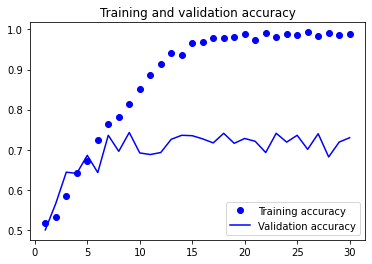

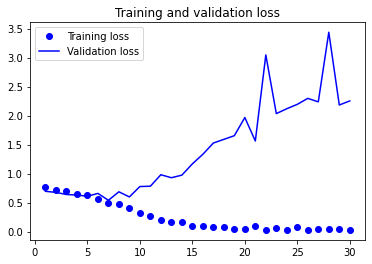

In [82]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [83]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 36ms/step - loss: 0.5702 - accuracy: 0.6980
Test accuracy: 0.698


In [84]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

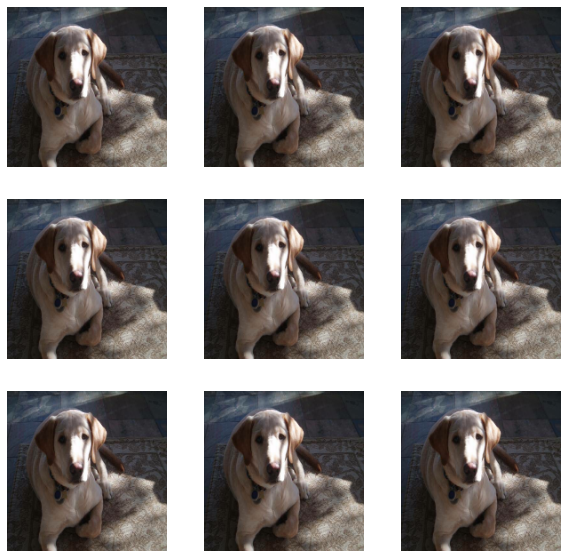

In [85]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [86]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [87]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 8s 98ms/step - loss: 0.7074 - accuracy: 0.4965 - val_loss: 0.6922 - val_accuracy: 0.5660
Epoch 2/100
63/63 [==============================] - 6s 97ms/step - loss: 0.7040 - accuracy: 0.5070 - val_loss: 0.6892 - val_accuracy: 0.5280
Epoch 3/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6876 - accuracy: 0.5460 - val_loss: 0.6748 - val_accuracy: 0.5380
Epoch 4/100
63/63 [==============================] - 6s 96ms/step - loss: 0.6895 - accuracy: 0.5820 - val_loss: 0.6346 - val_accuracy: 0.6530
Epoch 5/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6524 - accuracy: 0.6220 - val_loss: 0.7385 - val_accuracy: 0.5560
Epoch 6/100
63/63 [==============================] - 7s 100ms/step - loss: 0.6351 - accuracy: 0.6360 - val_loss: 0.6151 - val_accuracy: 0.6480
Epoch 7/100
63/63 [==============================] - 6s 95ms/step - loss: 0.6282 - accuracy: 0.6490 - val_loss: 0.6371 - val_accuracy: 0.6010
Epoch

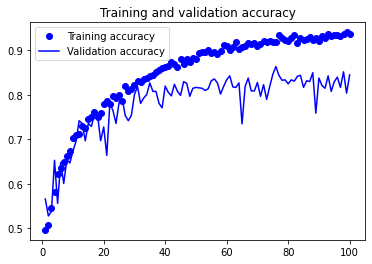

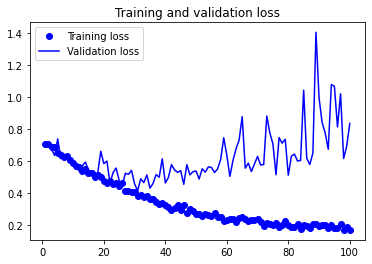

In [88]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [89]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 35ms/step - loss: 0.4690 - accuracy: 0.7960
Test accuracy: 0.796


In [90]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

In [91]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 21ms/step


In [92]:
train_features.shape

(2000, 5, 5, 512)

In [93]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 21.4701 - accuracy: 0.9100 - val_loss: 4.6933 - val_accuracy: 0.9690
Epoch 2/20
63/63 [==============================] - 0s 7ms/step - loss: 3.7163 - accuracy: 0.9775 - val_loss: 3.4012 - val_accuracy: 0.9740
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 1.8765 - accuracy: 0.9845 - val_loss: 4.2239 - val_accuracy: 0.9730
Epoch 4/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7487 - accuracy: 0.9925 - val_loss: 5.5168 - val_accuracy: 0.9670
Epoch 5/20
63/63 [==============================] - 0s 7ms/step - loss: 1.1452 - accuracy: 0.9920 - val_loss: 5.2550 - val_accuracy: 0.9720
Epoch 6/20
63/63 [==============================] - 0s 7ms/step - loss: 0.7818 - accuracy: 0.9930 - val_loss: 4.5749 - val_accuracy: 0.9720
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 0.8936 - accuracy: 0.9910 - val_loss: 4.3184 - val_accuracy: 0.9760
Epoch 8/20
63/63 [

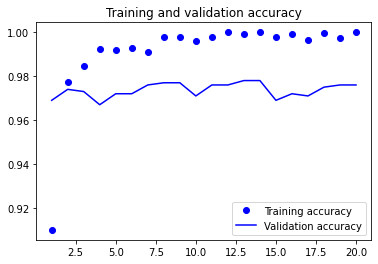

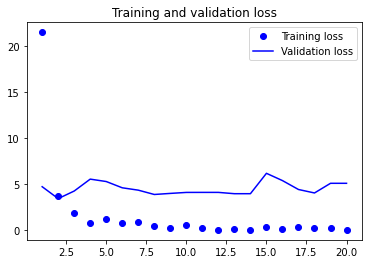

In [94]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

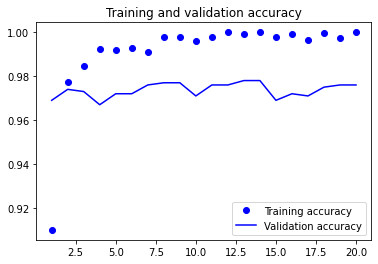

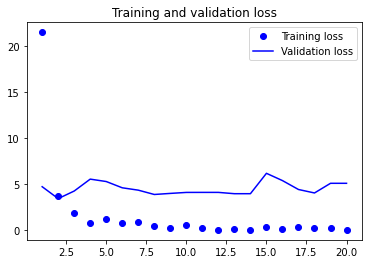

In [95]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [96]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [97]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [98]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


In [99]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [100]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 14s 201ms/step - loss: 18.7994 - accuracy: 0.8960 - val_loss: 5.1194 - val_accuracy: 0.9630
Epoch 2/50
63/63 [==============================] - 13s 198ms/step - loss: 6.0297 - accuracy: 0.9440 - val_loss: 9.3623 - val_accuracy: 0.9450
Epoch 3/50
63/63 [==============================] - 13s 206ms/step - loss: 5.5427 - accuracy: 0.9590 - val_loss: 4.8804 - val_accuracy: 0.9690
Epoch 4/50
63/63 [==============================] - 13s 199ms/step - loss: 4.6908 - accuracy: 0.9605 - val_loss: 16.1341 - val_accuracy: 0.9290
Epoch 5/50
63/63 [==============================] - 13s 202ms/step - loss: 4.4751 - accuracy: 0.9600 - val_loss: 4.1515 - val_accuracy: 0.9720
Epoch 6/50
63/63 [==============================] - 13s 199ms/step - loss: 3.3168 - accuracy: 0.9685 - val_loss: 4.7329 - val_accuracy: 0.9690
Epoch 7/50
63/63 [==============================] - 13s 201ms/step - loss: 2.8496 - accuracy: 0.9770 - val_loss: 2.3217 - val_accuracy: 0.98

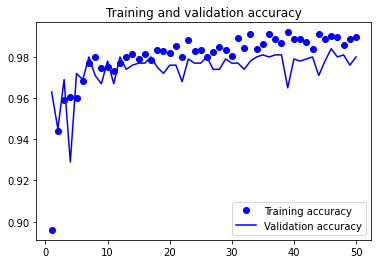

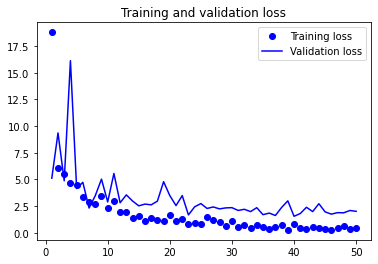

In [101]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [102]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 110ms/step - loss: 1.7077 - accuracy: 0.9770
Test accuracy: 0.977


In [103]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [104]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [105]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 16s 224ms/step - loss: 0.3734 - accuracy: 0.9900 - val_loss: 2.0438 - val_accuracy: 0.9810
Epoch 2/30
63/63 [==============================] - 14s 215ms/step - loss: 0.6759 - accuracy: 0.9885 - val_loss: 2.0440 - val_accuracy: 0.9830
Epoch 3/30
63/63 [==============================] - 14s 216ms/step - loss: 0.5190 - accuracy: 0.9890 - val_loss: 2.5108 - val_accuracy: 0.9760
Epoch 4/30
63/63 [==============================] - 14s 215ms/step - loss: 0.3858 - accuracy: 0.9910 - val_loss: 2.0839 - val_accuracy: 0.9840
Epoch 5/30
63/63 [==============================] - 14s 221ms/step - loss: 0.4674 - accuracy: 0.9890 - val_loss: 2.0423 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 14s 214ms/step - loss: 0.1964 - accuracy: 0.9940 - val_loss: 2.3652 - val_accuracy: 0.9730
Epoch 7/30
63/63 [==============================] - 14s 212ms/step - loss: 0.3746 - accuracy: 0.9930 - val_loss: 2.3266 - val_accuracy: 0.9750

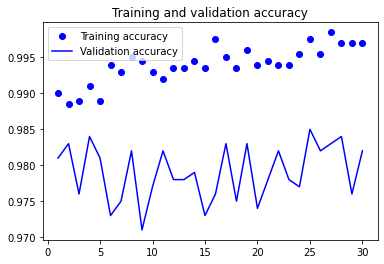

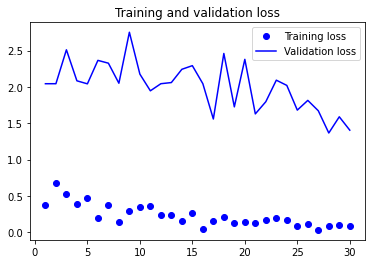

In [106]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [107]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 4s 110ms/step - loss: 1.7008 - accuracy: 0.9790
Test accuracy: 0.979
